In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

from pandas.plotting import scatter_matrix


In [294]:
train_data = pd.read_csv('D:/sem 5/Machine learnig/phase -2/project11/Train_Data.csv')
test= pd.read_csv('D:/sem 5/Machine learnig/phase -2/project11/testdata.csv')
labels= pd.read_csv('D:/sem 5/Machine learnig/phase -2/project11/Traindata_classlabels.csv')


In [295]:
train_data.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_widt

In [296]:
labels.info

<bound method DataFrame.info of       price_range
0               1
1               2
2               2
3               2
4               1
...           ...
1995            0
1996            2
1997            3
1998            0
1999            3

[2000 rows x 1 columns]>

In [297]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [298]:
#Check number of Screen width and Pixcel height have zero 
print(len(train_data[train_data.sc_w == 0]))
# Total phones with px_height = 0
print(len(train_data[train_data.px_height == 0]))

180
2


In [299]:
# Screen width and Pixcel height can't be zero ,So,kNN imputer to fill zero values
from sklearn.impute import KNNImputer

features_to_impute = ['sc_w', 'px_height']

# Extract the selected features
train_data[features_to_impute]  = train_data[features_to_impute].replace(0, np.nan)

knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
train_data[features_to_impute] = knn_imputer.fit_transform(train_data[features_to_impute])
print(len(train_data[train_data.sc_w == 0]))
# Total phones with px_height = 0
print(len(train_data[train_data.px_height == 0]))


0
0


In [300]:
#checking whether there is duplicates or not
len(train_data[train_data.duplicated()])

0

In [301]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [302]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [303]:
labels.isnull().sum()

price_range    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

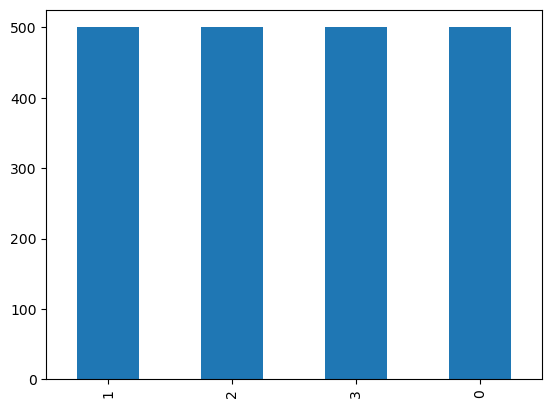

In [304]:
#disbrution of price range in training dataset
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
labels['price_range'].value_counts().plot(kind="bar")
plt.show

<Axes: >

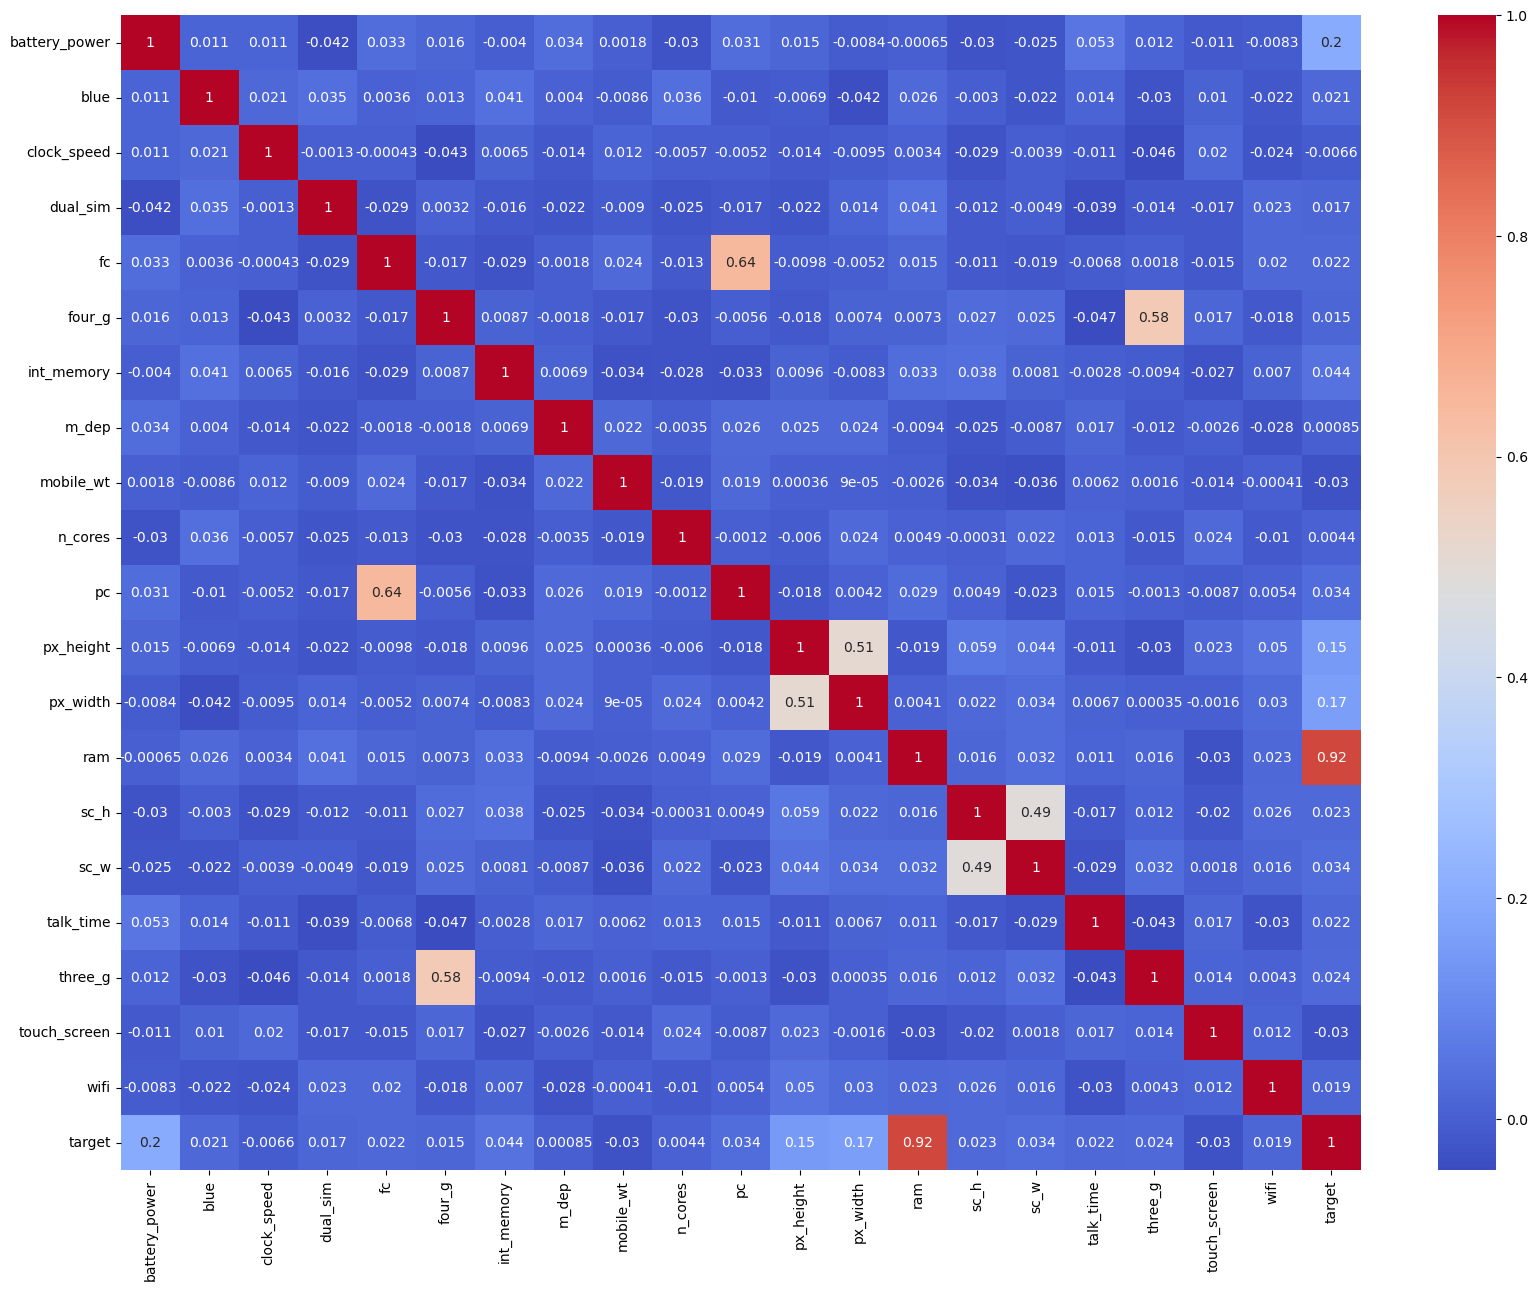

In [305]:
#Chech correlation of price range
train_data['target']=labels
correlation = train_data.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

<Axes: >

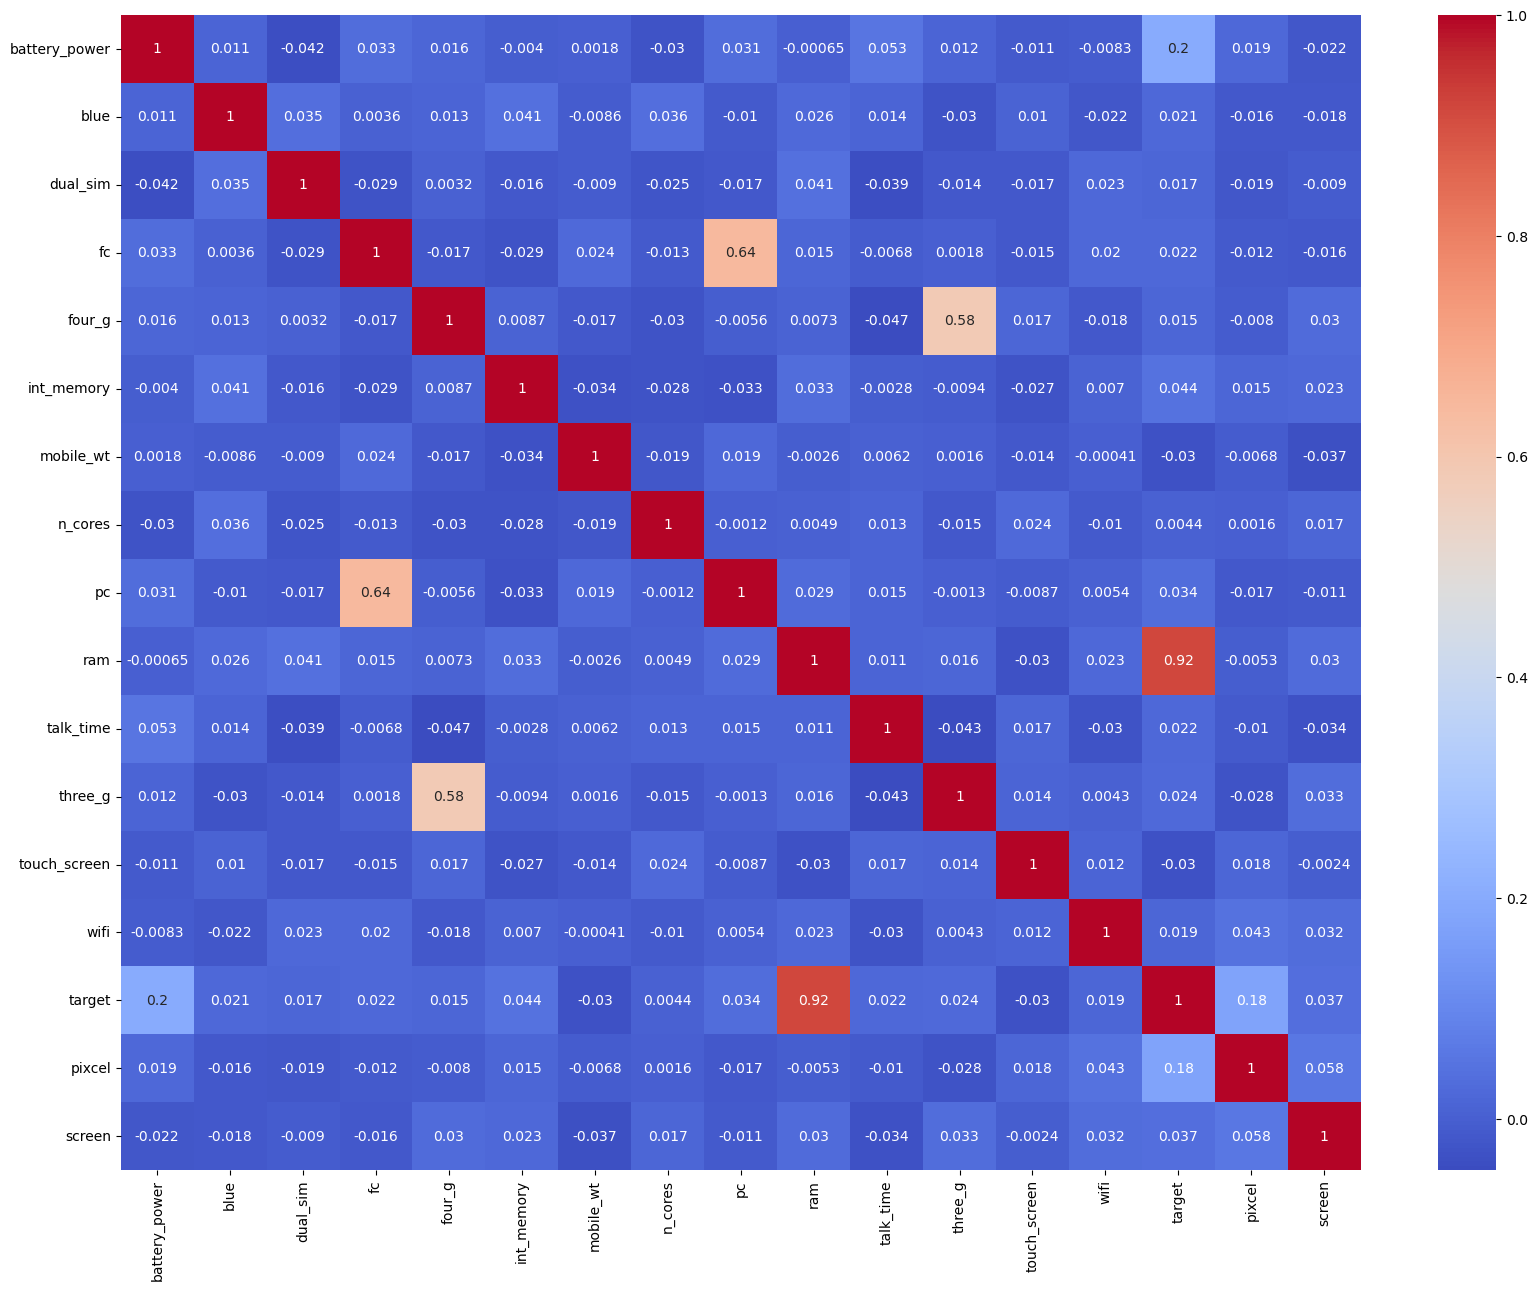

In [306]:
train_data['pixcel'] =train_data['px_width']*train_data['px_height']
# Dropping px_height and px_width

train_data.drop(['px_height','px_width'], axis = 1, inplace = True)
train_data['screen'] = train_data['sc_w']*train_data['sc_h']
# Dropping px_height and px_width

train_data.drop(['sc_h', 'sc_w',], axis = 1, inplace = True)


train_data.drop(['m_dep', 'clock_speed'], axis = 1, inplace = True)
# Checking for multi-collinearity
correlation = train_data.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

In [307]:
col= ['four_g','three_g','wifi','blue','dual_sim']

# Perform one-hot encoding
train_data_s = pd.get_dummies(train_data, columns=col)

# Display the resulting DataFrame
print("Original DataFrame:")
print(train_data.head())
print("\nDataFrame after One-Hot Encoding:")
print(train_data_s.head())

Original DataFrame:
   battery_power  blue  dual_sim  fc  four_g  int_memory  mobile_wt  n_cores  \
0            842     0         0   1       0           7        188        2   
1           1021     1         1   0       1          53        136        3   
2            563     1         1   2       1          41        145        5   
3            615     1         0   0       0          10        131        6   
4           1821     1         0  13       1          44        141        2   

   pc   ram  talk_time  three_g  touch_screen  wifi  target     pixcel  screen  
0   2  2549         19        0             0     1       1    15120.0    63.0  
1   6  2631          7        1             1     0       2  1799140.0    51.0  
2   6  2603          9        1             1     0       2  2167308.0    22.0  
3   9  2769         11        1             0     0       2  2171776.0   128.0  
4  14  1411         15        1             1     0       1  1464096.0    16.0  

DataFrame af

<Axes: >

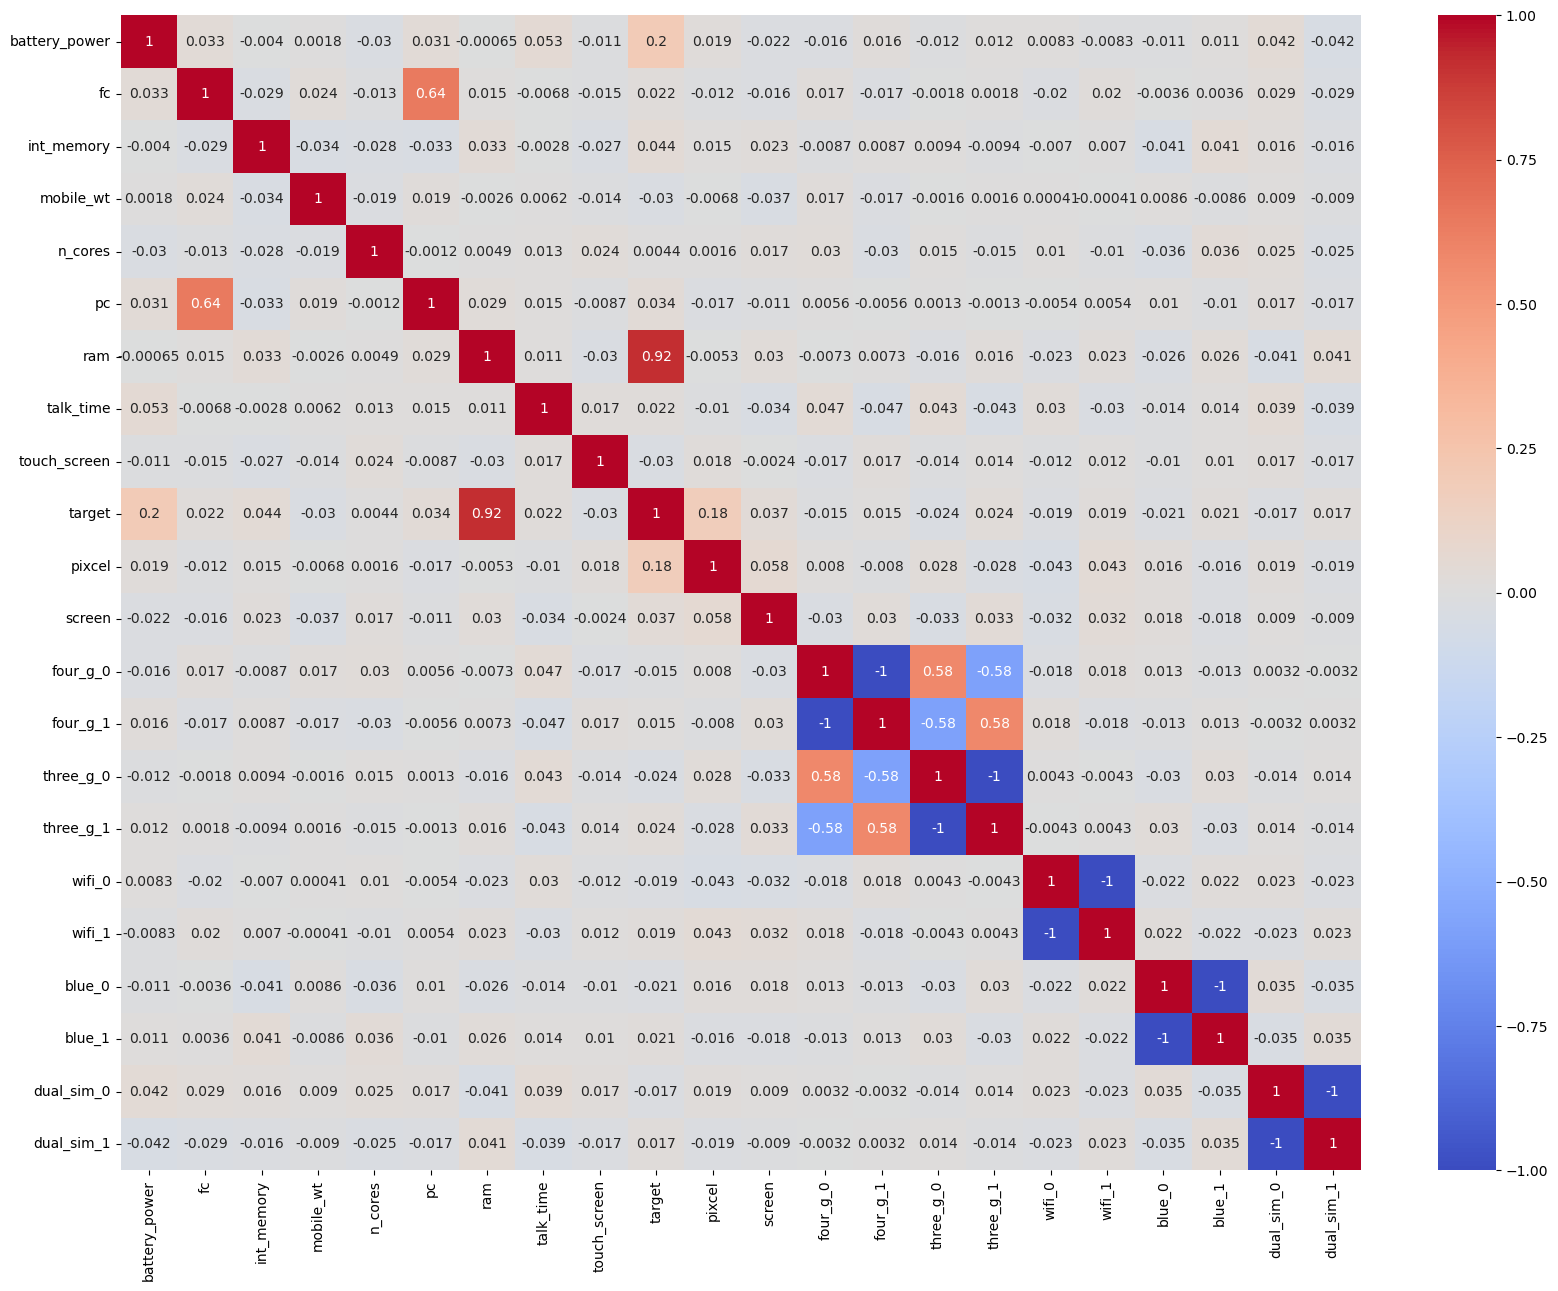

In [308]:

correlation = train_data_s.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

In [309]:
train_data_s.drop(['target'], axis = 1, inplace = True)

In [310]:
train_data_s.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
ram,2000.0,2124.213000,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0
talk_time,2000.0,11.011000,5.463955,2.0,6.00,11.0,16.00,20.0
touch_screen,2000.0,0.503000,0.500116,0.0,0.00,1.0,1.00,1.0
pixcel,2000.0,906211.539054,829335.372015,926.0,264144.00,606880.0,1359027.25,3886306.0


In [311]:
X = train_data_s
y = labels['price_range']
y.shape
X.shape

(2000, 21)

In [312]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [314]:
# feature selection
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k=12)  # You can adjust the value of k as needed


X_train_s = k_best.fit_transform(X_train, y_train)
X_test_s= k_best.transform(X_test)

### Logistic regression

In [315]:
#with feature selection
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_s, y_train)


LogisticRegression()

In [316]:
# Prediction
y_pred_test = lr.predict(X_test_s)
y_pred_train = lr.predict(X_train_s)
# Evaluation metrics for test
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression in Test set= ')
print(classification_report(y_pred_test, y_test))
# Evaluation metrics for train
from sklearn.metrics import classification_report, accuracy_score
print('Classification report for Logistic Regression in Train set= ')
f=f1_score(y_pred_train, y_train, average='macro')
print( classification_report(y_pred_train, y_train))

print(f)


Classification report for Logistic Regression in Test set= 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       104
           1       0.96      0.92      0.94        95
           2       0.87      0.93      0.90        86
           3       0.96      0.93      0.94       115

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Classification report for Logistic Regression in Train set= 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       396
           1       0.93      0.93      0.93       408
           2       0.92      0.92      0.92       408
           3       0.96      0.96      0.96       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

0.9460548

In [317]:
#logastic regression with cross vadilation(Hyperparameter tuning)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(estimator=lr,
                param_grid = {'random_state':(0,100) } , 
                scoring = 'f1_macro', cv = 5)
cv.fit(X_train_s, y_train)
y_pred_test = cv.predict(X_test_s)
y_pred_train =cv.predict(X_train_s)
# Evaluation metrics for train
from sklearn.metrics import classification_report, accuracy_score
print('Classification report for Logistic Regression in Train set= ')
print( classification_report(y_pred_train, y_train))
# Evaluation metrics for test
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression in Test set= ')
print(classification_report(y_pred_test, y_test))
f=f1_score(y_pred_train, y_train, average='macro')
print(f)

Classification report for Logistic Regression in Train set= 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       396
           1       0.93      0.93      0.93       408
           2       0.92      0.92      0.92       408
           3       0.96      0.96      0.96       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

Classification report for Logistic Regression in Test set= 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       104
           1       0.96      0.92      0.94        95
           2       0.87      0.93      0.90        86
           3       0.96      0.93      0.94       115

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

0.9460548

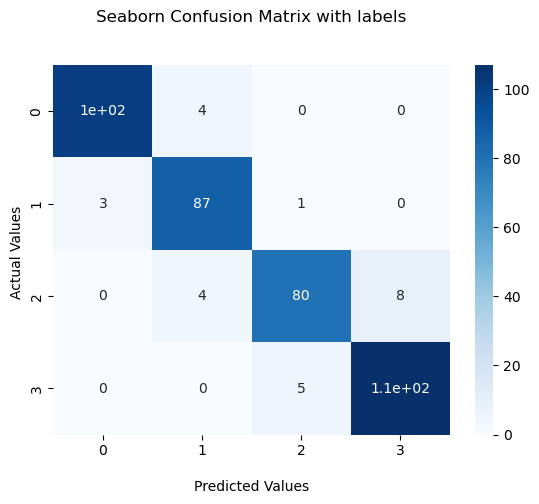

In [318]:
#Confusion matrix For Logistic regression for training dataset with features selection and logistic regression Cross validation
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the Confusion Matrix.
plt.show()

## Decision tree 

In [319]:
#Decision tree with features selection
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5,random_state=40)
dtc.fit(X_train_s, y_train)

DecisionTreeClassifier(max_depth=5, random_state=40)

In [320]:
# Prediction
y_pred_test = dtc.predict(X_test_s)
y_pred_train = dtc.predict(X_train_s)
# Evaluation metrics for test
from sklearn.metrics import classification_report
print('Classification report for decison tree in Test set= ')
print(classification_report(y_pred_test, y_test))
# Evaluation metrics for train
from sklearn.metrics import classification_report, accuracy_score
print('Classification report for Decision tree  in Train set= ')
print( classification_report(y_pred_train, y_train))


Classification report for decison tree in Test set= 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        93
           1       0.81      0.73      0.77       101
           2       0.78      0.67      0.72       108
           3       0.81      0.93      0.87        98

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.82       400

Classification report for Decision tree  in Train set= 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       370
           1       0.88      0.81      0.84       443
           2       0.84      0.77      0.80       449
           3       0.84      0.96      0.90       338

    accuracy                           0.87      1600
   macro avg       0.87      0.88      0.87      1600
weighted avg       0.87      0.87      0.87      1600



In [321]:
# Cross validation for decision tree(Hyperparameter tuning)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {
            'criterion':('gini', 'entropy'), 
            'max_features':( 'sqrt', 'log2'),
            'max_depth':(5,40)
 } , scoring = 'f1_macro', cv = 5, verbose = 24)
grid.fit(X_train_s, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START criterion=gini, max_depth=5, max_features=sqrt..............
[CV 1/5; 1/8] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.328 total time=   0.0s
[CV 2/5; 1/8] START criterion=gini, max_depth=5, max_features=sqrt..............
[CV 2/5; 1/8] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.379 total time=   0.0s
[CV 3/5; 1/8] START criterion=gini, max_depth=5, max_features=sqrt..............
[CV 3/5; 1/8] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.424 total time=   0.0s
[CV 4/5; 1/8] START criterion=gini, max_depth=5, max_features=sqrt..............
[CV 4/5; 1/8] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.260 total time=   0.0s
[CV 5/5; 1/8] START criterion=gini, max_depth=5, max_features=sqrt..............
[CV 5/5; 1/8] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.435 total time=   0.0s
[CV 1/5; 2/8] START criterion=gini, max_depth

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=40),
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': (5, 40),
                         'max_features': ('sqrt', 'log2')},
             scoring='f1_macro', verbose=24)

In [322]:
# Prediction
y_pred_test = grid.predict(X_test_s)
y_pred_train = grid.predict(X_train_s)
# Evaluation metrics for test
print('Classification Report for Decision Tree in Test set = ')
print(classification_report(y_test, y_pred_test))
# Evaluation metrics for train
print('Classification Report for Decision Tree in Train set = ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree in Test set = 
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       105
           1       0.49      0.55      0.52        91
           2       0.45      0.55      0.50        92
           3       0.74      0.56      0.64       112

    accuracy                           0.60       400
   macro avg       0.61      0.60      0.60       400
weighted avg       0.63      0.60      0.61       400

Classification Report for Decision Tree in Train set = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



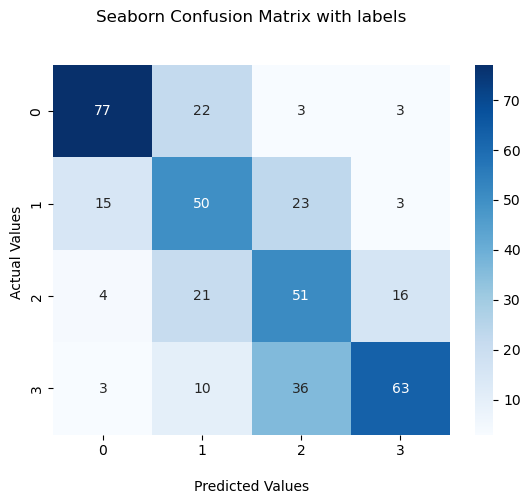

In [323]:
#Confusion matrix For decision tree for training dataset with features selection and Cross validation
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the Confusion Matrix.
plt.show()

## SVC

In [324]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_s, y_train)
# Prediction
y_pred_test = svc.predict(X_test_s)
y_pred_train = svc.predict(X_train_s)
# Evaluation metrics for test
print('Classification Report for SVM in Test set= ')
print(classification_report(y_test, y_pred_test))
# Evaluation metrics for train
print('Classification Report for SVM in Train set= ')
print(classification_report(y_train, y_pred_train))


Classification Report for SVM in Test set= 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       105
           1       0.92      0.96      0.94        91
           2       0.90      0.89      0.90        92
           3       0.95      0.94      0.94       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Classification Report for SVM in Train set= 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       395
           1       0.92      0.94      0.93       409
           2       0.93      0.90      0.92       408
           3       0.96      0.96      0.96       388

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



In [325]:
#Cross validation For SVC(Hyperparameter tuning)
grid_search = GridSearchCV(estimator=svc, param_grid=  {
    'C': [0.1, 1, 10, 100, 1000], # Regularization parameter
    'kernel': ['linear','rbf','poly','sigmoid'], # Kernel type
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001]# Kernel coefficient for 'rbf' and 'poly'
}
, scoring='f1_macro',cv=5)
# Fit the model to the training data with cross-validation
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_macro')

In [326]:
# Prediction

y_pred_test = grid.predict(X_test_s)
y_pred_train = grid.predict(X_train_s)
# Evaluation metrics for test

print('Classification Report for SVC in Test set= ')
print(classification_report(y_test, y_pred_test))
# Evaluation metrics for train

print('Classification Report for SVC in Train set= ')
print(classification_report(y_train, y_pred_train))

Classification Report for SVC in Test set= 
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       105
           1       0.49      0.55      0.52        91
           2       0.45      0.55      0.50        92
           3       0.74      0.56      0.64       112

    accuracy                           0.60       400
   macro avg       0.61      0.60      0.60       400
weighted avg       0.63      0.60      0.61       400

Classification Report for SVC in Train set= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



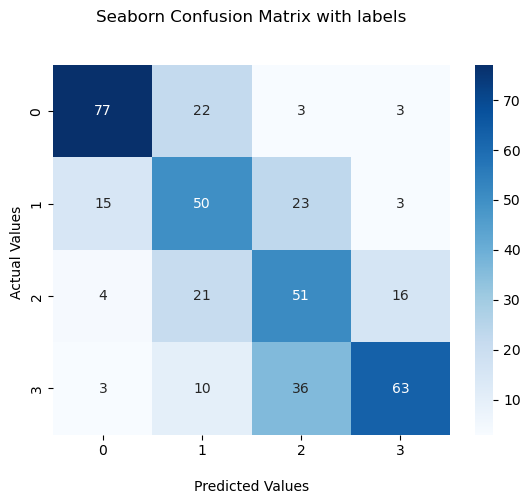

In [327]:
#Confusion matrix For SVC for training dataset with features selection and Cross validation
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the Confusion Matrix.
plt.show()

## Random forest

In [328]:
#Random forest 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train_s, y_train)

RandomForestClassifier(n_estimators=300)

In [329]:
y_pred_test = clsr.predict(X_test_s)
y_pred_train = clsr.predict(X_train_s)
# Evaluation metrics for test

print('Classification Report for random forest in Test set= ')
print(classification_report(y_test, y_pred_test))
# Evaluation metrics for train
print('Classification Report for random forest in Train set= ')
print(classification_report(y_train, y_pred_train))


Classification Report for random forest in Test set= 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.87      0.89      0.88        91
           2       0.83      0.84      0.83        92
           3       0.94      0.90      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Classification Report for random forest in Train set= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
#Cross validation For random forest classifer(Hyperparameter tuning)
from sklearn.model_selection import GridSearchCV
params = {'criterion':('entropy','gini'),       #measure the quality of a split.
            'n_estimators':(30,50,100),         #The number of trees in the forest.
            'max_depth':(10,20,30,50,100,200),
          'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node}  
         }# maximum depth of the tree.
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='f1_macro', cv=5)
clsr.fit(X_train_s, y_train)

In [ ]:
y_pred_test = clsr.predict(X_test_s)
y_pred_train = clsr.predict(X_train_s)
# Evaluation metrics for test

print('Classification Report for random forest in Test set== ')
print(classification_report(y_test, y_pred_test))
# Evaluation metrics for train

print('Classification Report for random forest in Training set== ')
print(classification_report(y_train, y_pred_train))

In [ ]:
#Confusion matrix For random forest for training dataset with features selection and Cross validation
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cf, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the Confusion Matrix.
plt.show()

## KNeighborsClassifier

In [ ]:
#kNN
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_s, y_train)

In [ ]:
y_pred_test = neigh.predict(X_test_s)
y_pred_train = neigh.predict(X_train_s)
# Evaluation metrics for test

print('Classification Report for KNeighborsClassifier in Test set= ')
print(classification_report(y_test, y_pred_test))
# Evaluation metrics for train

print('Classification Report for KNeighborsClassifier in Train set= ')
print(classification_report(y_train, y_pred_train))


In [ ]:
#Cross validation For KNeighborsClassifier(Hyperparameter tuning)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='f1_macro', cv=5, )
grid_search.fit(X_train_s, y_train)

In [ ]:
y_pred_test = grid_search.predict(X_test_s)
y_pred_train = grid_search.predict(X_train_s)
# Evaluation metrics for test

print('Classification Report for KNeighborsClassifier in Test set== ')
print(classification_report(y_test, y_pred_test))
# Evaluation metrics for train

print('Classification Report for KNeighborsClassifier in Training set== ')
print(classification_report(y_train, y_pred_train))

In [ ]:
# Predict labels for the test data
Test_pred = LogisticRegression.predict(test)

# Now, y_pred contains the predicted labels for your test data
print("Predicted labels:", Test_pred)